In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target
print(x)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [ ]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 5)

data = []

for i, a in enumerate(alpha):
  lasso = Lasso(alpha = a, random_state = 45)
  lasso.fit(x, y)
  data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index = alpha)
df_lasso.columns = x.columns
print(df_lasso)

             age         sex         bmi          bp          s1          s2  \
0.001  -8.996177 -238.896328  520.267403  323.423596 -720.244828  421.399753   
0.010  -1.304662 -228.819129  525.566130  316.168834 -307.016211   89.324647   
0.100  -0.000000 -155.359976  517.186795  275.077235  -52.539365   -0.000000   
1.000   0.000000   -0.000000  367.703860    6.298858    0.000000    0.000000   
10.000  0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

                s3          s4          s5         s6  
0.001    66.733503  164.448022  725.335558  67.476810  
0.010  -105.078369  119.597616  571.330356  65.008383  
0.100  -210.157991    0.000000  483.912648  33.673965  
1.000    -0.000000    0.000000  307.605418   0.000000  
10.000   -0.000000    0.000000    0.000000   0.000000  


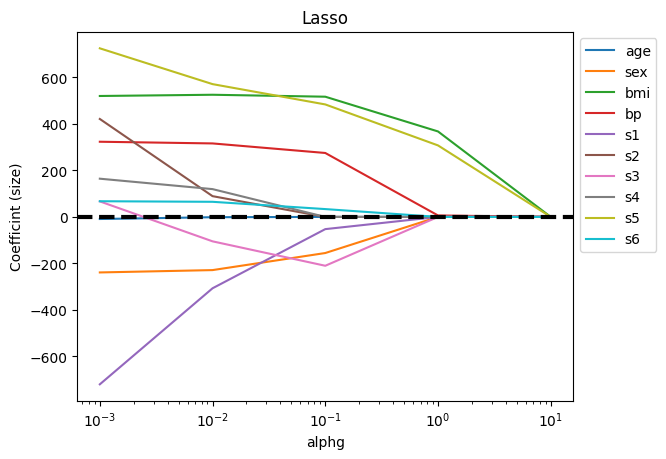

In [ ]:
plt.semilogx(df_lasso)
plt.xticks(alpha, label = np.log10(alpha))
plt.legend(labels = df_lasso.columns, bbox_to_anchor = (1, 1))
plt.title('Lasso')
plt.xlabel('alphg')
plt.ylabel('Coefficint (size)')
plt.axhline(y = 0, linestyle = '--', color = 'black', linewidth = 3)

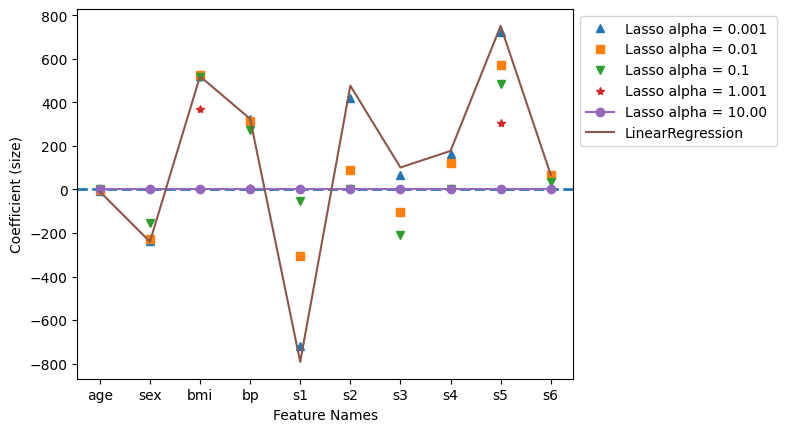

In [ ]:
plt.axhline(y = 0, linestyle = '--', linewidth = 2)
plt.plot(df_lasso.loc[0.001], '^', label = 'Lasso alpha = 0.001 ')
plt.plot(df_lasso.loc[0.01], 's', label = 'Lasso alpha = 0.01 ')
plt.plot(df_lasso.loc[0.1], 'v', label = 'Lasso alpha = 0.1 ')
plt.plot(df_lasso.loc[1.00], '*', label = 'Lasso alpha = 1.001 ')
plt.plot(df_lasso.loc[10.00], 'o-', label = 'Lasso alpha = 10.00 ')

plt.plot(lr.coef_, label = 'LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor = (1, 1))